In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("Student Depression Dataset.csv")

data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,No,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27901 non-null  int64  
 1   Gender                            27901 non-null  object 
 2   Age                               27901 non-null  int64  
 3   City                              27901 non-null  object 
 4   Profession                        27901 non-null  object 
 5   Academic Pressure                 27901 non-null  int64  
 6   Work Pressure                     27901 non-null  int64  
 7   CGPA                              27901 non-null  float64
 8   Study Satisfaction                27901 non-null  int64  
 9   Job Satisfaction                  27901 non-null  int64  
 10  Family History of Mental Illness  27901 non-null  object 
 11  Depression                        27901 non-null  int64  
dtypes: f

In [4]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,1.000000


In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.Age.describe()

,Age
count,27901.000000
mean,25.822300
std,4.905687
min,18.000000
25%,21.000000
50%,25.000000
75%,30.000000
max,59.000000


In [12]:
fig = px.histogram(data, x="Age",marginal='box',nbins=47, title="Age Distribution")
fig.update_layout(bargap=0.05)
fig.show()

In [14]:
fig = px.histogram(data,
                   x='CGPA',
                   marginal='box',
                   title='CGPA Distribution')
fig.update_layout(bargap=0.05)
fig.show()

<Axes: xlabel='Age', ylabel='Count'>

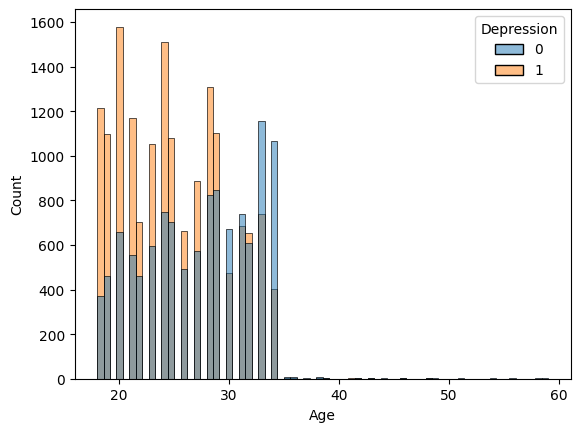

In [19]:
sns.histplot(data,x='Age',hue="Depression")

In [22]:
px.scatter(data,
           x='Age',
           y='CGPA',
           color='Depression',
           title='Age vs Depression')

In [23]:
data.Depression.corr(data.Age)

np.float64(-0.22642204090166534)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
features = ['Academic Pressure', 'Study Satisfaction', 'Age', 'CGPA']
X = data[features]
y = data['Depression']
model= LogisticRegression()
model.fit(X,y)
# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2375
           1       0.76      0.81      0.79      3206

    accuracy                           0.75      5581
   macro avg       0.74      0.74      0.74      5581
weighted avg       0.74      0.75      0.74      5581



In [47]:
model

LogisticRegression()

In [48]:
#['Academic Pressure', 'Study Satisfaction', 'Age', 'CGPA']
model.predict(np.array([[2,5,24,5.90],[5,2,33,8.97],[3,2,28,5.59]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0, 1, 1])

In [49]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Training (Random Forest Example)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      2375
           1       0.71      0.74      0.73      3206

    accuracy                           0.68      5581
   macro avg       0.67      0.67      0.67      5581
weighted avg       0.68      0.68      0.68      5581



In [50]:
model

RandomForestClassifier()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store all models and their performance
models = {}
results = []

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', max_iter=1000)

# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier
models['Decision Tree'] = DecisionTreeClassifier(max_depth=5, random_state=42)

# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 4. Support Vector Machine
from sklearn.svm import SVC
models['SVM'] = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)

# 5. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['KNN'] = KNeighborsClassifier(n_neighbors=5)

# 6. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 7. Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# 8. XGBoost
from xgboost import XGBClassifier
models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train and evaluate all models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluate performance
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1 (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1 (1)': report['1']['f1-score']
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Recall (1)', ascending=False))

# Feature Importance for tree-based models
print("\nFeature Importances:")
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        print(f"\n{name}:")
        print(importance)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:42:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Accuracy  Precision (0)  Recall (0)    F1 (0)  \
1        Decision Tree  0.745744       0.739378    0.609048  0.667915   
5    Gradient Boosting  0.748611       0.728599    0.639351  0.681064   
6          Naive Bayes  0.746103       0.715149    0.656850  0.684761   
7              XGBoost  0.734456       0.699213    0.644900  0.670959   
4                  KNN  0.708296       0.666202    0.611609  0.637739   
0  Logistic Regression  0.728902       0.658882    0.734528  0.694652   
3                  SVM  0.728722       0.657665    0.737943  0.695495   
2        Random Forest  0.667443       0.606008    0.594110  0.600000   

   Precision (1)  Recall (1)    F1 (1)  
1       0.749110    0.844657  0.794019  
5       0.760284    0.827671  0.792548  
6       0.765529    0.810686  0.787461  
7       0.756725    0.799259  0.777411  
4       0.734694    0.778258  0.755849  
0       0.790502    0.724830  0.756243  
3       0.792005    0.722051  0.755412  
2       0.7104

In [60]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

In [73]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(X_test.shape)
X_train.shape
Y_pred_class = logreg.predict(X_test)

(6976, 4)


In [64]:
# make class predictions for the testing set


In [65]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred_class))

0.7528669724770642


In [66]:
# print the first 25 true and predicted responses
print('Actual:', Y_test.values[0:25])
print('Pred:', Y_pred_class[0:25])

Actual: [1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1]
Pred: [1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1]


In [67]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(Y_test, Y_pred_class))

[[1952  939]
 [ 785 3300]]


In [68]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier

logreg = DecisionTreeClassifier(max_depth=5, random_state=42)
logreg.fit(X_train, Y_train)
print(X_test.shape)
X_train.shape

(6976, 4)


(20925, 4)

In [69]:
# make class predictions for the testing set
Y_pred_class = logreg.predict(X_test)

In [70]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred_class))

0.7534403669724771


In [71]:
# print the first 25 true and predicted responses
print('Actual:', Y_test.values[0:25])
print('Pred:', Y_pred_class[0:25])

Actual: [1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1]
Pred: [1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1]


In [72]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(Y_test, Y_pred_class))

[[1918  973]
 [ 747 3338]]
